# ОИАД. Лабораторная работа 5

# 1. Сгенерируйте данные

Рассматриваем задачу бинарной классификации. Пусть распределение каждого класса является многомерным нормальным.

Обозначим $\mu^{+} = (\mu^{+}_1, \mu^{+}_2)$ - параметр положения положительного класса (+1), аналогично $\mu^{-}$ - отрицательного (-1)

$\Sigma$ - общая для классов ковариационная матрица

Выберите параметры таким образом, чтобы классы немного пересекались (небыло линейно разделимого случая)

* Сгенерируйте по $N=30$ объектов кажого класса и визуализируйте полученную выборку
* Разделите данные на обучающую, валидационную и тестовую выборки

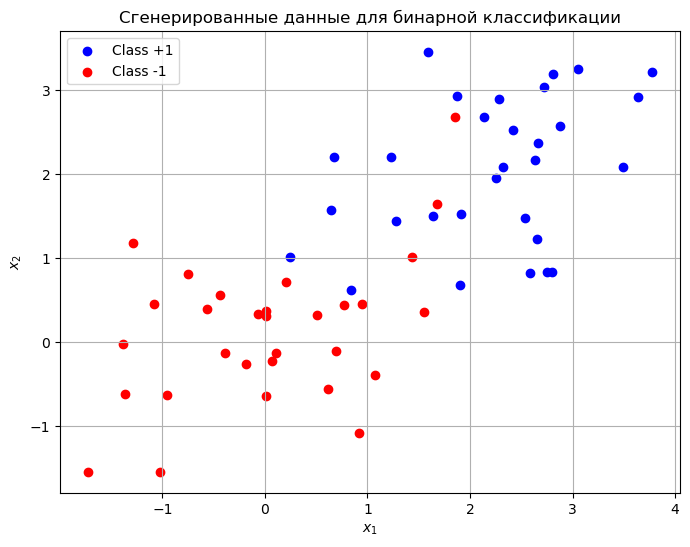

Размеры выборок:
Обучающая выборка: X_train: (30, 2), y_train: (30,)
Валидационная выборка: X_val: (15, 2), y_val: (15,)
Тестовая выборка: X_test: (15, 2), y_test: (15,)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mu_positive = [2, 2]
mu_negative = [0, 0] 
cov_matrix = [[1, 0.5], [0.5, 1]]

N = 30 

np.random.seed(42)
positive_class = np.random.multivariate_normal(mu_positive, cov_matrix, N)
negative_class = np.random.multivariate_normal(mu_negative, cov_matrix, N)

y_positive = np.ones(N) 
y_negative = -1 * np.ones(N) 

X = np.vstack((positive_class, negative_class))
y = np.hstack((y_positive, y_negative)) 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='blue', label='Class +1')
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='red', label='Class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Сгенерированные данные для бинарной классификации')
plt.legend()
plt.grid(True)
plt.show()

print("Размеры выборок:")
print(f"Обучающая выборка: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Валидационная выборка: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Тестовая выборка: X_test: {X_test.shape}, y_test: {y_test.shape}")

# 2. Логистическая регрессия
*В этом пункте используется **обучающая** выборка*
* Реализуйте и обучите модель логистической регрессии (пакеты нельзя использовать)
* Покажите на графике полученную разделяющую поверхность
* Для нескольких объектов из обоих классов вывести оценки вероятностей их распределения по классам

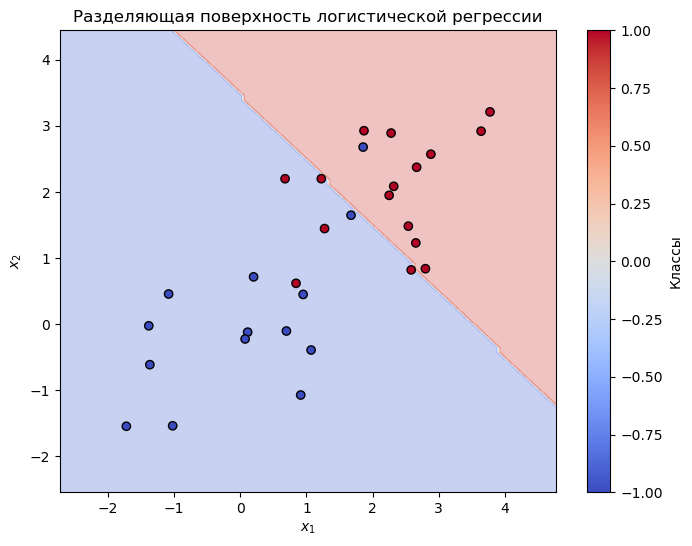

Оценки вероятностей принадлежности к классам для нескольких объектов:
Объект 1: Координаты [2.2803935  2.89206979], Истинный класс: 1.0, Вероятность принадлежности к классу +1: 1.0000
Объект 2: Координаты [2.5405444  1.48283348], Истинный класс: 1.0, Вероятность принадлежности к классу +1: 0.9960
Объект 3: Координаты [2.58393791 0.82089775], Истинный класс: 1.0, Вероятность принадлежности к классу +1: 0.2743
Объект 4: Координаты [1.67496155 1.64844768], Истинный класс: -1.0, Вероятность принадлежности к классу +1: 0.1534
Объект 5: Координаты [2.65389295 1.22914477], Истинный класс: 1.0, Вероятность принадлежности к классу +1: 0.9826

Размеры выборок:
Обучающая выборка: X_train: (30, 2), y_train: (30,)
Валидационная выборка: X_val: (15, 2), y_val: (15,)
Тестовая выборка: X_test: (15, 2), y_test: (15,)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mu_positive = [2, 2]  
mu_negative = [0, 0]  
cov_matrix = [[1, 0.5], [0.5, 1]] 

N = 30  

np.random.seed(42)
positive_class = np.random.multivariate_normal(mu_positive, cov_matrix, N)
negative_class = np.random.multivariate_normal(mu_negative, cov_matrix, N)


y_positive = np.ones(N) 
y_negative = -1 * np.ones(N)  

X = np.vstack((positive_class, negative_class)) 
y = np.hstack((y_positive, y_negative))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_predicted_proba = self.predict_proba(X)
        y_predicted = [1 if i > 0.5 else -1 for i in y_predicted_proba]
        return np.array(y_predicted)

log_reg = LogisticRegressionCustom(learning_rate=0.1, n_iterations=1000)
log_reg.fit(X_train, y_train)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = log_reg.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Разделяющая поверхность логистической регрессии')
plt.colorbar(label='Классы')
plt.show()

sample_points = X_train[:5]
sample_classes = y_train[:5]
probabilities = log_reg.predict_proba(sample_points)

print("Оценки вероятностей принадлежности к классам для нескольких объектов:")
for i, (point, prob, true_class) in enumerate(zip(sample_points, probabilities, sample_classes)):
    print(f"Объект {i+1}: Координаты {point}, Истинный класс: {true_class}, Вероятность принадлежности к классу +1: {prob:.4f}")

print("\nРазмеры выборок:")
print(f"Обучающая выборка: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Валидационная выборка: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Тестовая выборка: X_test: {X_test.shape}, y_test: {y_test.shape}")


# 3. Определение оптимального порога
*В этом пунке используется **валидационная** выборка*

Задача требует умения обнаруживать не менее 60% от поступающих положительных объектов (+1). Какой при этом необходимо выбрать порог $t$?

*Справочно:*
Объект классифицируется в положительный класс, если $\hat{p}(y=+1 | x) \equiv a(x) > t$

* Выведите значение $t$

In [32]:
import pandas as pd

probs_val = sigmoid(np.dot(X_val, weights))


data = pd.DataFrame({'probability': probs_val, 'label': y_val})

data = data.sort_values(by='probability', ascending=False)

num_positive = np.sum(y_val == 1)
required_positives = int(0.6 * num_positive)

cumulative_positives = data['label'].cumsum()
t_index = np.where(cumulative_positives >= required_positives)[0][0]
threshold_t = data.iloc[t_index]['probability']

print(f'Необходимый порог t для обнаружения не менее 60% положительных объектов: {threshold_t:.3f}')

Необходимый порог t для обнаружения не менее 60% положительных объектов: 0.939


# 4. Оценка результатов классификатора
*В этом пунке используется **тестовая** выборка*

Оцените качество полученного алгоритма рассчитав метрики:
* Accuracy
* матрица ошибок
* Precision, Recall
* ROC - кривая, ROC-AUC

Accuracy: 0.1333
Матрица ошибок:
[[2 0]
 [8 0]]
Precision: 1.0000
Recall: 0.2000


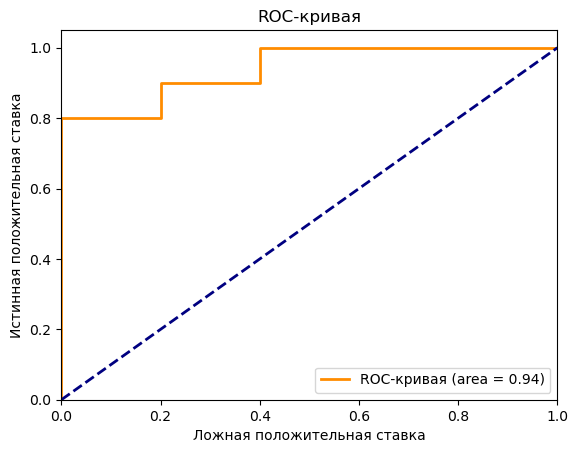

ROC-AUC: 0.9400


In [35]:
from sklearn.metrics import roc_curve, auc
predicted_prob = sigmoid(np.dot(X_test, weights))

t = threshold_t
y_pred = (predicted_prob > t).astype(int)


accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy: {accuracy:.4f}')

TP = np.sum((y_pred == 1) & (y_test == 1))
TN = np.sum((y_pred == 0) & (y_test == 0))  
FP = np.sum((y_pred == 1) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1)) 
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print('Матрица ошибок:')
print(confusion_matrix)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, predicted_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложная положительная ставка')
plt.ylabel('Истинная положительная ставка')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

print(f'ROC-AUC: {roc_auc:.4f}')